In [3]:
import pandas as pd
import numpy as np


In [4]:
df=pd.read_csv('binary.csv')
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [5]:
df.shape

(400, 4)

In [6]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [8]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [9]:
for x in df.columns:
    print(x ,':', len(df[x].unique()))

admit : 2
gre : 26
gpa : 132
rank : 4


In [10]:
from sklearn.model_selection import train_test_split
X=df[['gre','gpa','rank']]
Y=df["admit"]
x_train, x_test, y_train,  y_test = train_test_split(X,Y,test_size=0.2)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred8=classifier.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred8)
print(score)

0.725


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred9=knn.predict(x_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred9)
print(score)

0.65


In [16]:
error=[]
import numpy as np
for i in range(1,40):
    neigh=KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    pred_i=neigh.predict(x_test)
    error.append(np.mean(pred_i !=y_test))
    

Text(0, 0.5, 'mean error')

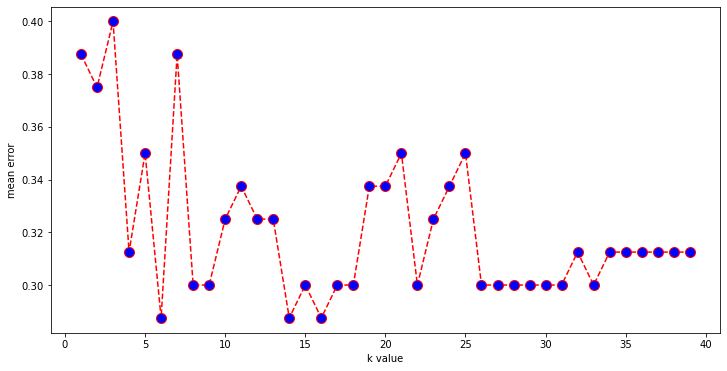

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('k value')
plt.ylabel('mean error')

In [18]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred3=knn.predict(x_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred3)
print(score)

0.65


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred4=knn.predict(x_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred4)
print(score)

0.65


In [22]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred5=gnb.predict(x_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred5)
print('Test Accuracy Score',score)


Test Accuracy Score 0.725
